# Titanic_Modeling.ipynb
# Purpose: Train and evaluate models on the cleaned Titanic dataset

In [8]:
# --- 1️⃣ Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

sns.set_style("whitegrid")

# --- 2️⃣ Load cleaned dataset ---
df = pd.read_csv("titanic_cleaned.csv")
df.head()


,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [9]:
# --- 3️⃣ Define target and features ---
y = df['survived']            # Target variable
X = df.drop(columns=['survived'])  # Features

In [10]:
# --- 4️⃣ Scale numeric features ---
scaler = StandardScaler()
num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,1,0.827377,0,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,2,-1.566107,1,0.663861,0.432793,-0.473674,0.786845,False,False
2,3,0.827377,1,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,4,-1.566107,1,0.433312,0.432793,-0.473674,0.420730,False,True
4,5,0.827377,0,0.433312,-0.474545,-0.473674,-0.486337,False,True


In [11]:
# --- 5️⃣ Split data into train and test sets ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (712, 9), Test size: (179, 9)


In [12]:
# --- 6️⃣ Train Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8379888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [13]:
# --- 7️⃣ Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [14]:
# --- 8️⃣ Compare models ---
comparison = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_log)],
    "Precision": [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_log)],
    "Recall": [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_log)],
    "F1-Score": [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_log)]
})

print("=== Comparison Metrics ===")
print(comparison)


=== Comparison Metrics ===
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.837989   0.835821  0.756757  0.794326
1  Logistic Regression  0.804469   0.774648  0.743243  0.758621


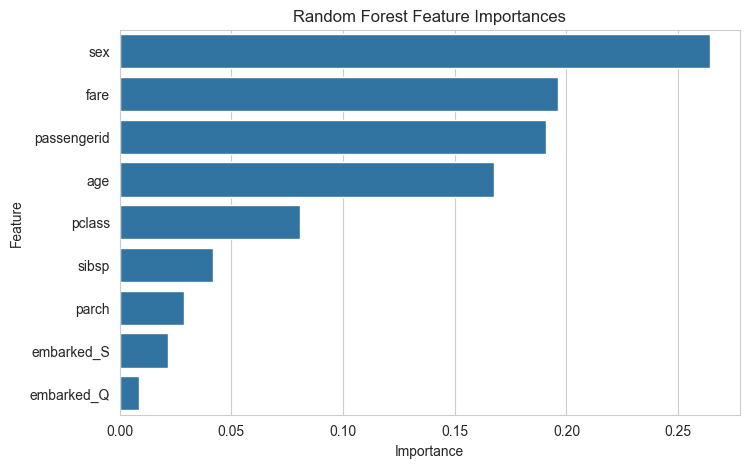

In [15]:
# --- 9️⃣ Feature Importances (Random Forest) ---
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

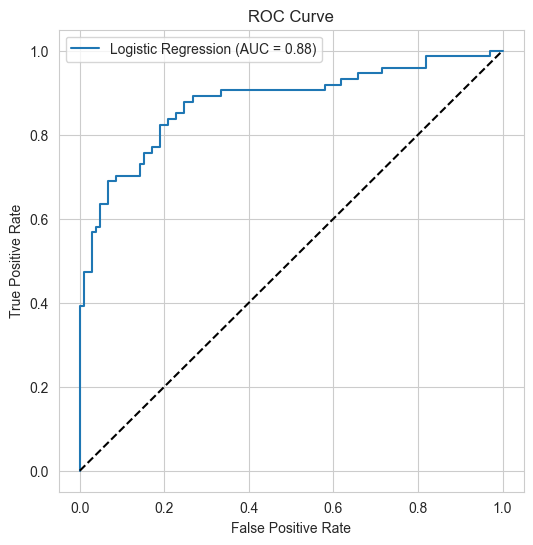

In [16]:
# --- 🔟 ROC Curve & AUC (Logistic Regression) ---
y_prob_log = log_model.predict_proba(X_test)[:,1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
auc_score = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

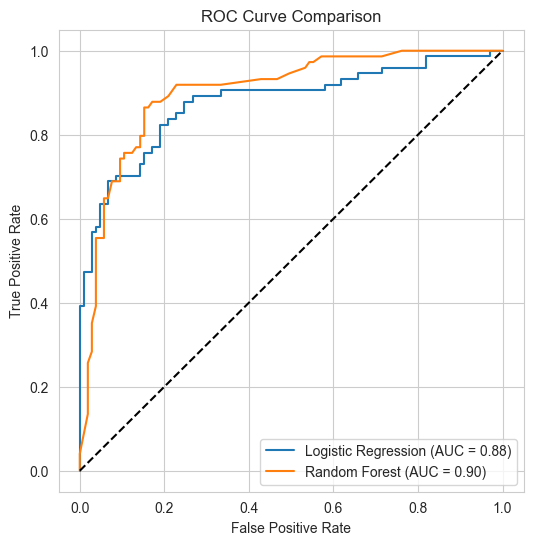

In [17]:
# Random Forest probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

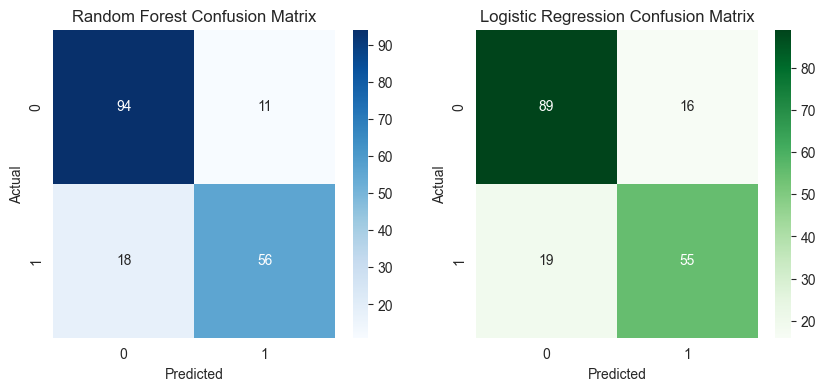

In [18]:
# Confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(10,4))

# Random Forest
plt.subplot(1,2,1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Logistic Regression
plt.subplot(1,2,2)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [19]:
# --- 1️⃣1️⃣ Summary ---
print("✅ Random Forest performs slightly better overall in accuracy and precision.")
print("✅ Logistic Regression is still solid and interpretable.")
print("✅ Feature importances show which factors influence survival the most.")

✅ Random Forest performs slightly better overall in accuracy and precision.
✅ Logistic Regression is still solid and interpretable.
✅ Feature importances show which factors influence survival the most.
